# Project 3
### Aviral Choudhary , ### directory - aviral, ### UID - 115500129 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

## Part 1: Regression analysis of Gapminder data

In [26]:
data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Exercise 1: *Make a scatter plot of life expectancy across time.*


Text(0, 0.5, 'Life Expectancy')

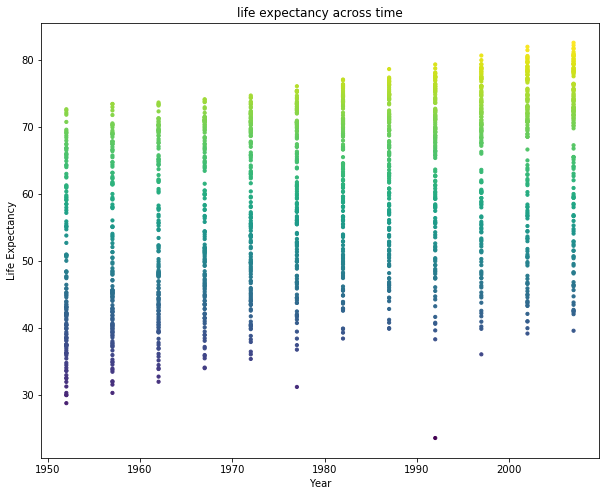

In [27]:
plt.figure(figsize = (10, 8))
plt.scatter(data.year,data.lifeExp, s = 10 ,c = data.lifeExp)
plt.title('life expectancy across time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

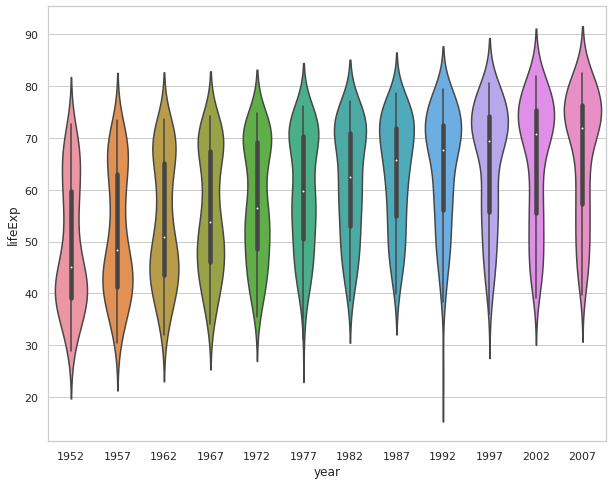

In [28]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
ax = sns.violinplot(x = "year", y = "lifeExp", data = data)

###### Question 1: *Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? 

Yes there is a genereal increasing trend between life exectancy across time as we see each year the life expectancy life shifts upwards. It starts with being concentrated at bottom to be concentrated at top as we the x value increases 

###### Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

There is some level of skew present in the distribution of life expectancy acrosss time as for some years there is some outlier y values (for ex 1992). The data also does not appear to be unimodal and symmetric. 

###### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)

Yes I will reject the null hyothesis, as from the graph we can see there is definently some positive coorelation between year and life expectancy as we can see for a higher X value(year), we would generally get a higher Y value(life expectancy)

###### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)

The graph schould look linear as well.

###### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?

The voilin plot would likely look like a standatd normal distribution (around 0 and symmetric) and the plot would be linear as well


### Exercise 2: Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable). There is no need to plot anything here, but please print the fitted model out in a readable format.


In [29]:
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

X = data.year
y = data.lifeExp

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.55e-80
Time:                        23:19:26   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -585.6522     32.314    -18.124      0.0

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


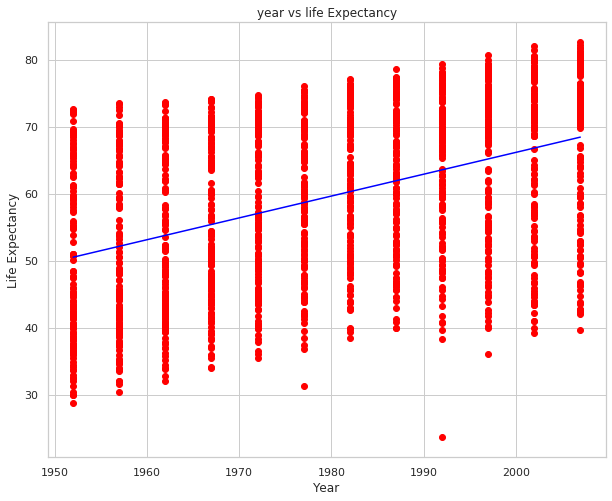

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sklearn-indexerror-tuple-index-ou
X = data[['year']]
y = data[['lifeExp']]

regr = LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

data['prediction'] = y_pred

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = 'red')
plt.plot(X, regr.predict(X), color = 'blue')
plt.title('year vs life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

In [31]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,prediction
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,50.512084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,52.141603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,53.771122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,55.400642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,57.030161


###### Question 6: On average, by how much does life expectancy increase every year around the world?
 
On average it increases by 0.3259 year.


###### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why? 

We would reject the null hypothesis as the p-value = 0 is smaller than any 
$\alpha$ (0.05 by default) at the given significance level of $\alpha$

### Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

Text(0, 0.5, 'Life Expectancy Residual')

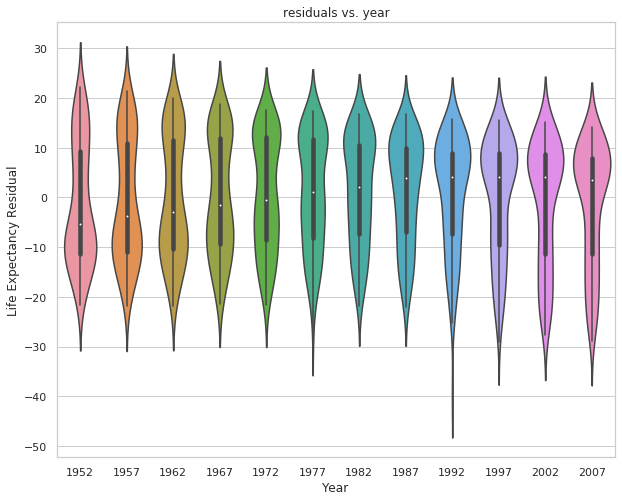

In [32]:
data['residual'] = data['lifeExp'] - data['prediction']
# data.head()

plt.figure(figsize = (10, 8))
sns.violinplot(x = 'year', y = 'residual', data = data)
plt.title('residuals vs. year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy Residual')


###### Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

Yes the grpah is standard normally distributed centered around 0 and as the graph is linear

### Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.

Text(0, 0.5, 'Life Expectancy Residual')

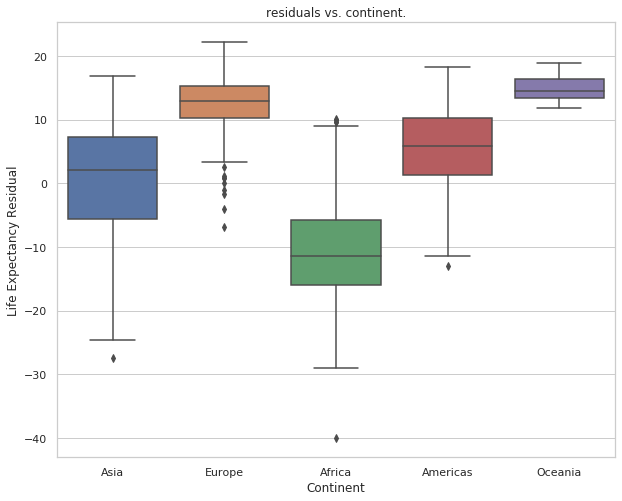

In [33]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'continent', y = 'residual', data = data)
plt.title('residuals vs. continent.')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy Residual')

###### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Yes, there does seem to be dependence between residual and continent as each the size of each continents block is different. I would suggest using 
different linear regression models for each continent by using different continent 

### Exercise 5: As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line. The result here can be given as either one scatter plot per continent, each with its own regression line, or a single plot with each continent's points plotted in a different color, and one regression line per continent's points. The former is probably easier to code up.

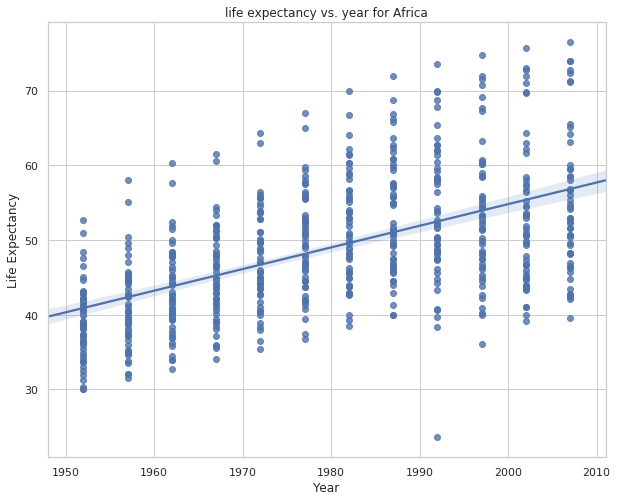

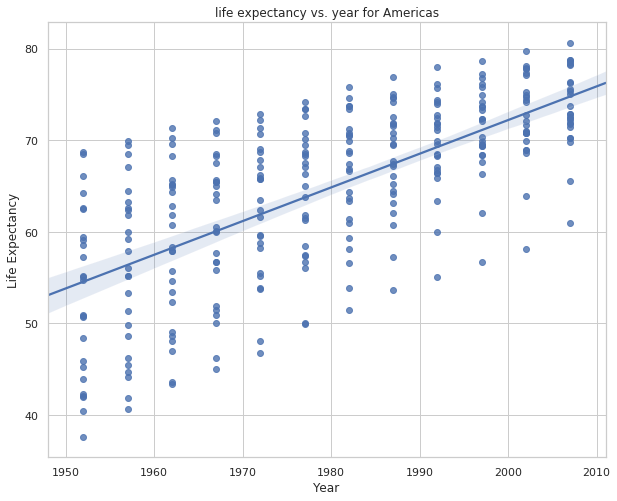

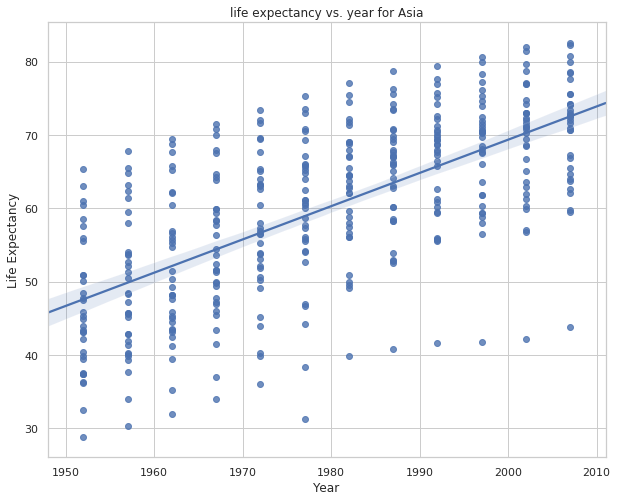

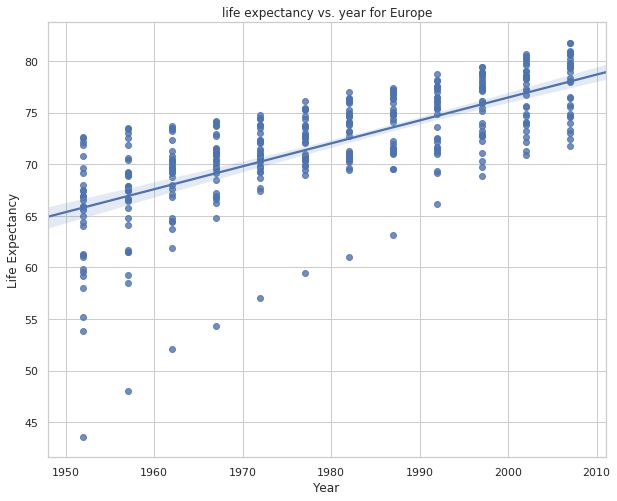

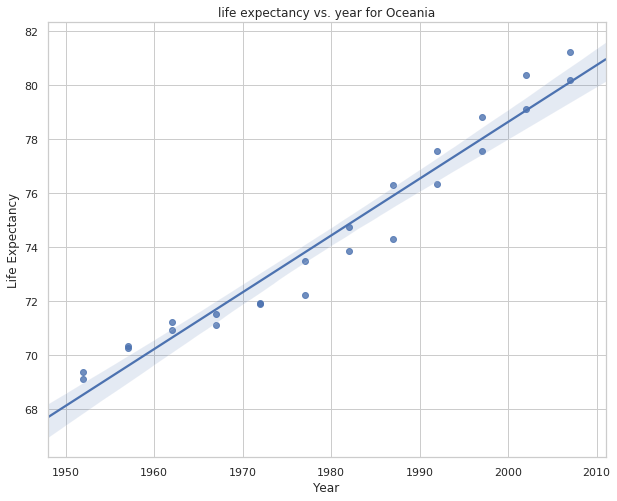

In [34]:
# https://stackoverflow.com/questions/23691133/split-pandas-dataframe-based-on-groupby

gb = data.groupby('continent')    
lst = [gb.get_group(x) for x in gb.groups]
cont = ['Africa','Americas','Asia','Europe','Oceania']
i = 0
for x in lst:
    plt.figure(figsize = (10, 8))
    sns.regplot(x = "year", y = "lifeExp", data = x)
    plt.title("life expectancy vs. year for " + cont[i])
    i = i + 1
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    
    

###### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

Yes, as there is significant change in line of best fit as we go from one continent to another 

### Exercise 6: Fit a linear regression model for life expectancy including a term for an interaction between continent and year. Print out the model in a readable format, e.g., print the coefficients of the model (no need to plot). Hint: adding interaction terms is a form of feature engineering, like we discussed in class (think about, e.g., using (a subset of) polynomial features here).

In [35]:
regr2 = smf.ols(formula = 'lifeExp ~ year * continent', data = data).fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:19:30   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

###### Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

Most of the continents models are significantly different from 0, with p values less than $\alpha$ =  0.05. However,  Oceania's p value = 0.287 without interaction and p value = 0.360 with interaction; as a result, thus making it not significantly different from zero

###### Question 12: On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)

In [36]:
regr2.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

Look at regression params, we can conclude that life expectancy in
<ul>
    <li>Africa increasesby 0.289529 </li>
    <li>Americas increases by 0.078122 </li>
    <li>Asia increases by 0.163593 </li>
    <li>Europe decreases by 0.067597 </li>
    <li>Oceania decreases by 0.079257 </li>
</ul>


### Exercise 8: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3

Text(0.5, 1.0, 'residuals vs. year violin plot for the interaction model.')

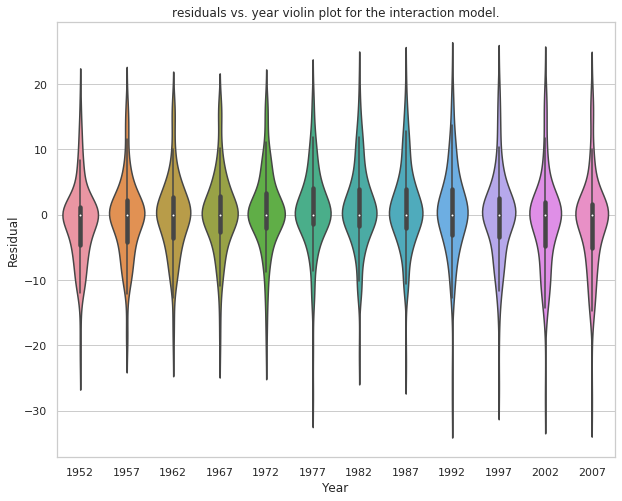

In [37]:
test = data[['continent', 'year', 'lifeExp']];

y_Africa = regr2.params[5]
i_Africa = regr2.params[0]

y_America = y_Africa + regr2.params[6]
i_America = i_Africa + regr2.params[1]

y_Asia = y_Africa + regr2.params[7]
i_Asia = i_Africa + regr2.params[2]

y_Europe = y_Africa + regr2.params[8]
i_Europe = i_Africa + regr2.params[3]

y_Oceania = y_Africa + regr2.params[9]
i_Oceania = i_Africa + regr2.params[4]

test['residual'] = 0

test['residual'][test['continent'] == 'Africa']   = test['lifeExp'] - ((y_Africa  * test['year']) + i_Africa)
test['residual'][test['continent'] == 'America']  = test['lifeExp'] - ((y_America * test['year']) + i_America)
test['residual'][test['continent'] == 'Asia']     = test['lifeExp'] - ((y_Asia    * test['year']) + i_Asia)
test['residual'][test['continent'] == 'Europe']   = test['lifeExp'] - ((y_Europe  * test['year']) + i_Europe)
test['residual'][test['continent'] == 'Oceania']  = test['lifeExp'] - ((y_Oceania * test['year']) + i_Oceania)


plt.figure(figsize=(10,8))
sns.violinplot(x='year', y='residual', data = test);
plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('residuals vs. year violin plot for the interaction model.')

## Part 2: Classification

###### Problem 1 Implement the gradient descent algorithm (either batch or stochastic versions) for multiple linear regression. I.e., extend the version of the algorithm in the lecture notes to multiple parameters.

In [38]:
# Training Data - X,Y ; 
# T - Number of Steps ; 
# alpha - step size

def grad_descent(X, Y, alpha, T):
    m, n  = X.shape       # m = #examples, n = #features
    theta = np.zeros(n)   # initialize parameters
    f     = np.zeros(T)   # track loss over time
    for i in range(T):
    # loss for current parameter vector theta
        f[i] =  0.5 * np.linalg.norm(X.dot(theta) - Y[i])**2
    # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - Y[i])
    # step down the gradient
        theta = theta - alpha * g
    return theta, f

###### Problem 2 (This problem is +5 points of extra credit.) Derive the above update equation. Write the derivation in a markdown ipynb cell.

$  \beta^{k+1} = \beta^k + \alpha \sum_{i=1}^{n} (y_i - p_i(\beta^k))\mathbf{x_i} $

Logistic function: <br>
    $P(Y=1|X; w)= 1/(1+exp(w_0+\sum_{i=1}^{n} (w_iX_i))) $
<br>
    $P(Y=0|X;w)= 1  - 1/(1+exp(w_0+\sum_{i=1}^{n} (w_iX_i))) $  
    
Likelihood: $\prod_{l}P(Y^l|W,X^l)$

$l(W)= ln(\prod_{l}P(Y^l|W,X^l))= $ 
<br>
$\sum_{l}Y^l(w_0+\sum_{i}{n})-ln(1+exp(w_0+\sum_{i}^{n}w_iX_i^l)) $

Maximizing Conditional Log Likelihood: <br> $\frac{\partial l(W)}{\partial w_i}=\sum_{l}X_i^l(Y^l-\hat{P}(Y^l=1|X^l,W)) $

Thus: <br>  $w_{i+1}=w_i+\alpha \sum_{l}X_i^l(Y^l-\hat{P}(Y^l=1|X^l,W)), $ where $w_i=\beta^k; l=[1,n]; Y^l=y_i; \hat{P}(Y^l=1|X^l,W)=p_i(\beta^k); X_i^l=\mathbf{x_i}$

Hence : $  \beta^{k+1} = \beta^k + \alpha \sum_{i=1}^{n} (y_i - p_i(\beta^k))\mathbf{x_i} $

###### Problem 3 Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., modify your code in problem 1 for the logistic regression update equation.

In [39]:
# Training Data - X,Y ; 
# T - Number of Steps ; 
# alpha - step size

def funX(x):
    return (np.exp(x)/(1+np.exp(x)))

def grad_descent_log(X, y, T, alpha):
    m, n = X.shape        # m = #examples, n = #features
    theta = np.zeros(n)   # initialize parameters
    f = np.zeros(T)       # track loss over time
    for i in range(T):
        p = funX(X.dot(theta))
        # loss for current parameter vector theta
        f[i] = alpha * ((y-p)).sum()
        # compute steepest ascent at f(theta)
        g = X.T.dot(p - y)
        # step down the gradient
        theta = theta - alpha*g
    return theta,f

###### Problem 4 To test your programs, simulate data from the linear regression and logistic regression models and check that your implementations recover the simulation parameters properly.

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Generate data for linear regression:
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

Text(0.5, 1.0, 'Linear Regression')

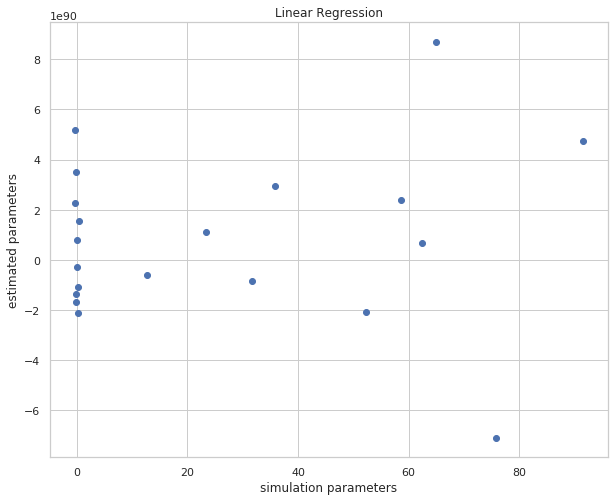

In [41]:
# theta, f = grad_descent(gen_data_x, gen_data_y, 100, .05)
theta, f = grad_descent(gen_data_x, gen_data_y,.05,100)


reg = LinearRegression().fit(gen_data_x, gen_data_y)
coef = reg.coef_

plt.figure(figsize=(10,8))
plt.scatter(coef, theta)
plt.xlabel("simulation parameters")
plt.ylabel("estimated parameters")
plt.title("Linear Regression")

Text(0.5, 1.0, 'Logistic Regression')

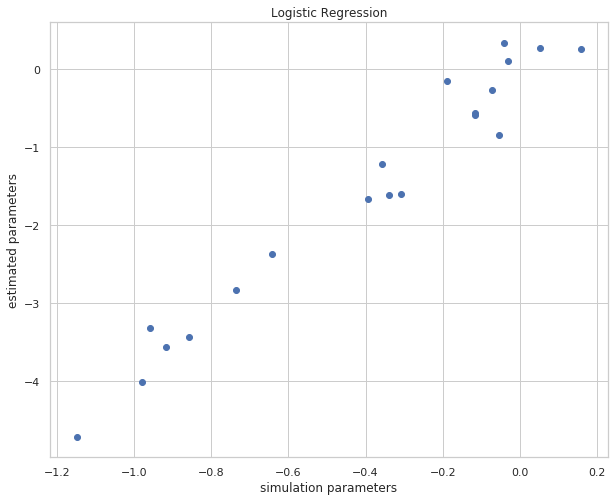

In [42]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(log_gen_data_x, log_gen_data_y)
theta, f = grad_descent_log(log_gen_data_x, log_gen_data_y,100,.05)
coef = clf.coef_[0]
plt.figure(figsize=(10,8))
plt.scatter(coef, theta)
plt.xlabel("simulation parameters")
plt.ylabel("estimated parameters")
plt.title("Logistic Regression")

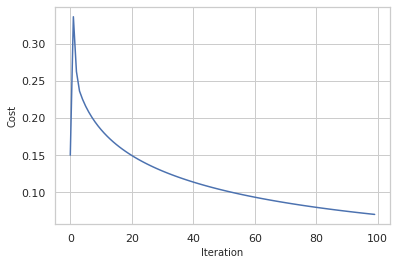

In [43]:
theta, cost = grad_descent_log(log_gen_data_x, log_gen_data_y,100,.05)
plt.plot(np.arange(100), cost)
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Cost', fontsize=10)
plt.show()

## Try it out!

Find a dataset on which to try out different classification (orregression) algorithms.

Choose two of the following algorithms:
<ol>
    <li>Linear Discriminant Analysis (LDA) (only classification)</li>
    <li>classification (or regression) trees,</li>
    <li>random forests</li>
    <li>linear SVM,</li>
    <li>non-linear SVM</li>
    <li>k-NN classification (or regression)</li>
<ol>

In [47]:
sklearn.datasets
cancer = sklearn.datasets.load_breast_cancer()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['1/0'] = pd.Categorical.from_codes(cancer.target, cancer.target_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,1/0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [49]:
X_train, X_test, y_train, y_test = \
    train_test_split(cancer.data, cancer.target,test_size=0.5, random_state=0)

#### Random Forest

In [50]:
n_estimators = [10, 20, 30, 40]
max_depth = [5, 8, 15]
min_samples_leaf = [1,2,3]

tuned_parameters = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
forest = RandomForestClassifier(random_state = 1)
randomForestClf = GridSearchCV(forest, tuned_parameters, cv = 3, verbose = 1, n_jobs = -1)
randomForestClf.fit(X_train, y_train)

y_true, y_pred = y_test, randomForestClf.predict(X_test)
kf = KFold(n_splits=10)

randomForestScore = cross_val_score(randomForestClf, X_train, y_train, cv = kf)

print(classification_report(y_true, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.9s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.9s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.0s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.9s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.9s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.0s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.0s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.9s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       101
           1       0.95      0.97      0.96       184

    accuracy                           0.95       285
   macro avg       0.95      0.94      0.94       285
weighted avg       0.95      0.95      0.95       285



[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.9s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Non Linear SVM

In [51]:
tuned_parameters= {'kernel': ['rbf'], 
                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                   'C': [1, 10, 100, 1000]}
    
svclassifier = GridSearchCV(SVC(), tuned_parameters, cv = 10,refit = True) 
svclassifier.fit(X_train, y_train)
y_true, y_pred = y_test, svclassifier.predict(X_test)
kf = KFold(n_splits=10)

svcScore = cross_val_score(svclassifier, X_train, y_train, cv = kf)
print('tuning')
print(classification_report(y_true, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The def

tuning
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       101
           1       0.96      0.97      0.96       184

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
score = []

def score_log_reg(y_pred,y_test):
    count = 0
    length = len(y_predict)
    for pred ,true in zip(y_predict, y_test):
        if pred == true:
            count+=1
    return count/length

kf = KFold(n_splits=10)
for train, test in kf.split(cancer.data):
    theta, f = grad_descent_log(cancer.data[train], cancer.target[train], 1000, 0.0000005)
    a = list(funX(cancer.data[test].dot(theta)).round())
    y_predict = [int(i) for i in a]
    score.append(score_log_reg(y_predict, cancer.target[test]))


s = np.asarray(score)
# print((svcScore).mean())
# print((randomForestScore).mean())
# print((s).mean())


In [60]:
from scipy import stats
a = stats.ttest_rel(svcScore,s)
b = stats.ttest_rel(randomForestScore,s)
print(a)
print(b)
print(svcScore.mean())
print(randomForestScore.mean())
print(s.mean())

Ttest_relResult(statistic=0.059896640218595025, pvalue=0.9535468858379734)
Ttest_relResult(statistic=1.75806831880274, pvalue=0.11260435754367963)
0.9225369458128079
0.9578817733990148
0.9209899749373432


In [58]:
## At time of writing 
## a = Ttest_relResult(statistic=-0.21574067210152517, pvalue=0.833999979267135)
## b = Ttest_relResult(statistic=0.39152824474058107, pvalue=0.7045153435570002)


###### Describe the dataset you are using, including: what is the outcome you are predicting (remember this should be a classification task) and what are the predictors you will be using.

I am using the breast cancer database from sklearn to predict, whether or not for the given X parameters the Y value is that the person's breast cancer is malignant or not

###### Include code to obtain and prepare your data as a dataframe to use with your three classification algorithms. In case your dataset includes non-numeric predictors, include the code you are using to transform these predictors into numeric predictors you can use with your logistic regression implementation.

Since I used the sklearn database ,all the values were already formated for testing and did not need to deal with non-numeric predictors. 


###### Specify the two additional algorithms you have chosen in part (b), and for algorithms that have hyper-parameters specify the method you are using for model selection.

The two other algorithms I used are Random Forests and Non-Linear SVM. I used GridSearchCV to get the best fit paraemerters for both. For Random Forest I chose to the following hyper-parameters  n_estimators, max_depth. I initially decided to tune more, but that over heated my PC. On the other hand for Non Linear SVM I choose to tune the C value and gamma. 

###### Include all code required to perform the 10-fold cross-validation procedure on your three algorithms.

For the Random Forest and NonLinear SVM I just used the cross-val-score from sklearn model selection and for my regression code I used K-Fold test for k = 10 in simple for lopp making a list of correct_prediction/total_possible for each test

kf = KFold(n_splits=10)

for train, test in kf.split(cancer.data):
    theta, f = grad_descent_log(cancer.data[train], cancer.target[train], 1000, 0.0000005)
    a = list(funX(cancer.data[test].dot(theta)).round())
    y_predict = [int(i) for i in a]
    score.append(score_log_reg(y_predict, cancer.target[test]))

kFold had 10 as parameter
svcScore = cross_val_score(svclassifier, X_train, y_train, cv = kFold)
randomForestScore = cross_val_score(randomForestClf, X_train, y_train, cv = kFold)

###### Write up the result of your 10-fold cross-validation procedure. Report on the result of the two paired t-tests comparing your logistic regression algorithm with your chosen two algorithms.

For the following algorithm the 10 fold cross validation reported: 
Non-Linear SVM 0.9225369458128079
Random Forest 0.9578817733990148
logistic 0.9209899749373432
Additionally, the t-test returned 
Non Linear SVM -> Ttest_relResult(statistic=0.059896640218595025, pvalue=0.9535468858379734)
Random Forest ->Ttest_relResult(statistic=1.75806831880274, pvalue=0.11260435754367963)
As the p-value is larger, at least greater that alpha = 0.05 we we would not reject Null Hypothesis and hence conclude that the my logistic regression produced the same output as NonLinear SVM and RandomForest